<a href="https://colab.research.google.com/github/muslimiin/tensorflow-project-klasifikasi-gambar/blob/master/tensorflow_muslimin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Profile
print("# Data Diri")
print("Nama: Muslimin")
print("Profil Dicoding: https://www.dicoding.com/users/muslimin2001/academies")

# Data Diri
Nama: Muslimin
Profil Dicoding: https://www.dicoding.com/users/muslimin2001/academies


In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import time
from google.colab import files

tf.keras.backend.clear_session()


In [ ]:
# Data Preparation
dataset_url = 'https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip'
dataset_dir = 'rockpaperscissors'
dataset_zip = 'rockpaperscissors.zip'

if not os.path.exists(dataset_zip):
    !wget {dataset_url}

if not os.path.exists(dataset_dir):
    with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
        zip_ref.extractall()


In [ ]:
# Data Augmentation and Generators
base_dir = os.path.join(dataset_dir, 'rps-cv-images')
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

train_samples = train_generator.samples
validation_samples = validation_generator.samples
assert train_samples == 1314, f"Expected 1314 training samples, but got {train_samples}"
assert validation_samples == 874, f"Expected 874 validation samples, but got {validation_samples}"


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
# Model Definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


In [ ]:
# Model Training
start_time = time.time()

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 64,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 64,
    epochs=20,
    verbose=2
)

final_accuracy = history.history['val_accuracy'][-1]
assert final_accuracy >= 0.85, f"Model accuracy is below 85%, got {final_accuracy:.2f}"

end_time = time.time()
training_time = end_time - start_time
print("\n")
print(f"Training completed in {training_time // 60:.0f} minutes and {training_time % 60:.0f} seconds.")
print("\n")
print(f"Final training accuracy: {history.history['accuracy'][-1] * 100:.2f}%")
print("\n")
print(f"Final validation accuracy: {final_accuracy * 100:.2f}%")
print("\n")


Epoch 1/20
20/20 - 18s - loss: 1.1149 - accuracy: 0.3912 - val_loss: 1.0150 - val_accuracy: 0.5180 - 18s/epoch - 884ms/step
Epoch 2/20
20/20 - 20s - loss: 0.9407 - accuracy: 0.5760 - val_loss: 0.8482 - val_accuracy: 0.5901 - 20s/epoch - 980ms/step
Epoch 3/20
20/20 - 15s - loss: 0.6632 - accuracy: 0.7416 - val_loss: 0.6068 - val_accuracy: 0.7560 - 15s/epoch - 769ms/step
Epoch 4/20
20/20 - 21s - loss: 0.5522 - accuracy: 0.7752 - val_loss: 0.4809 - val_accuracy: 0.8209 - 21s/epoch - 1s/step
Epoch 5/20
20/20 - 15s - loss: 0.4235 - accuracy: 0.8424 - val_loss: 0.4408 - val_accuracy: 0.8425 - 15s/epoch - 769ms/step
Epoch 6/20
20/20 - 20s - loss: 0.4353 - accuracy: 0.8320 - val_loss: 0.3887 - val_accuracy: 0.8522 - 20s/epoch - 983ms/step
Epoch 7/20
20/20 - 16s - loss: 0.3911 - accuracy: 0.8578 - val_loss: 0.3667 - val_accuracy: 0.8786 - 16s/epoch - 819ms/step
Epoch 8/20
20/20 - 15s - loss: 0.4228 - accuracy: 0.8344 - val_loss: 0.4351 - val_accuracy: 0.8570 - 15s/epoch - 772ms/step
Epoch 9/20


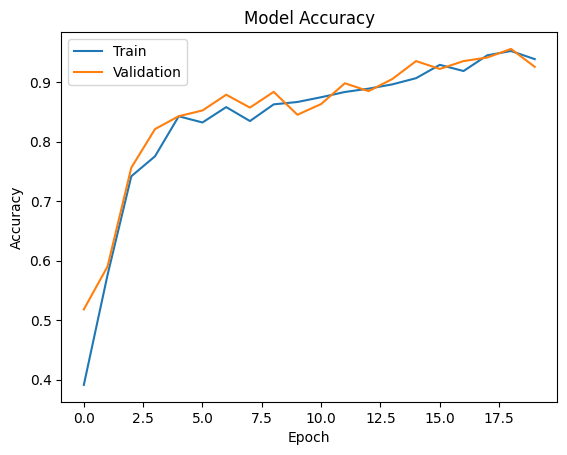

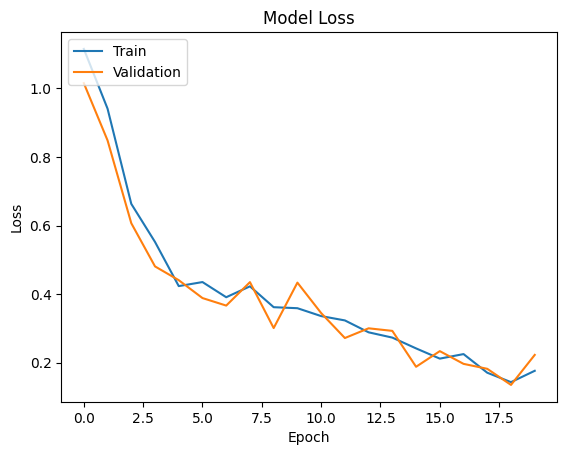

In [ ]:
# Plot Training History
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Saving aFWGfqQgf0jt1h7g.png to aFWGfqQgf0jt1h7g.png
1/1 [==============================] - 0s 27ms/step


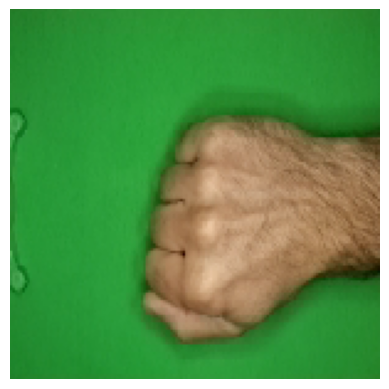



Gambar ini menunjukkan bentuk batu dengan tingkat kepercayaan 91.97%


In [ ]:
# Model Prediction
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    prediction = model.predict(img_tensor)
    return prediction, img

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    prediction, img = predict_image(path)

    plt.imshow(np.array(img) / 255.)
    plt.axis('off')
    plt.show()

    class_names = ['kertas', 'batu', 'gunting']
    predicted_class = class_names[np.argmax(prediction)]
    confidence = prediction[0][np.argmax(prediction)] * 100

    print("\n")
    print(f"Gambar ini menunjukkan bentuk {predicted_class} dengan tingkat kepercayaan {confidence:.2f}%")
